# Декораторы

## Лекции по декораторам от CSC

In [1]:
from IPython.display import YouTubeVideo

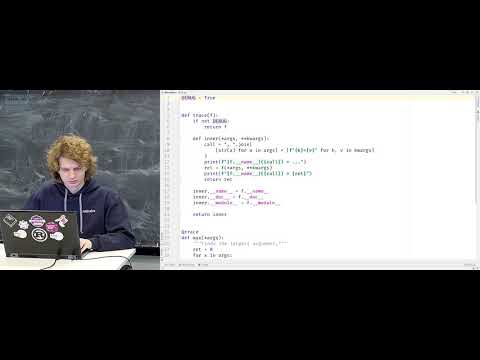

In [2]:
YouTubeVideo(id="rkjg71GJPvA", width=800, height=400)

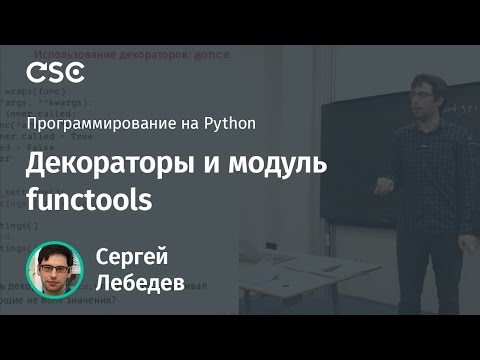

In [3]:
YouTubeVideo(id="h_B3O5jWMi4", width=800, height=400)

## Функции

In [14]:
def foo(x):
    """foo(x) — я функция, которая просто возвращает полученное значение."""
    return x

Функции хранят достаточно много информации о себе и с помощью специальных литералов мы можем доставать из них эту информацию

*Примеры:*

In [33]:
foo.__name__         # атрибут имени функции

'foo'

In [34]:
foo.__doc__          # атрибут документации по функции

'foo(x) - я функция, которая просто возвращаю полученно значение.'

In [3]:
foo.__module__       # атрибут модуля в котором находиться функция

'__main__'

In [15]:
from math import *
factorial.__module__ # атрибут модуля в котором находиться функция

'math'

In [13]:
int.__module__       # атрибут модуля в котором находиться функция

'builtins'

Мы можем вызывать функцию как с именованными аргументами, так и с позиционными

Однако когда мы вызываем функцию с именованными аргументами, то есть шансы, что мы при переименовании переменной функции можем забыть про наше изменение и получить ошибку, но когда у функции много аргументов, то это спасает

*Примеры:*

In [19]:
def minimal(x, y):
    """minimal(x, y) — я возвращаю минимальное из входных значений"""
    return x if x < y else y

In [24]:
minimal(-10, 10)         # вызываем функции через позиционные аргументы
minimal(x = -10, y = 10) # вызываем функцию через именовынные аргументы
minimal(-10, y = 10)     # вызываем функцию через позиционные и именованные аргументы

-10

Но что если мы захотели найти минимальное значение среди нескольних значений и мы не знаем сколько таких значений может быть

На помощь нам придёт следующая конструкция:

*какая-то_функция* (***аргументы_сюда**):
    
    что-то делает
    ...
    ...

*Пример:*

In [69]:
def minimal(*args):
    # type(args) => <class 'tuple'> (кортеж)
    
    res = float('inf') # берём значение +∞
    for element in args:
        res = element if element < res else res
    return res

In [51]:
minimal(-30, 200, -300, 1000, -3000)

-3000

In [56]:
lst = [1, 2, 3]
minimal(*lst)   # можно работать по любому объекту, которая может итерироваться
                # c помощью "*" мы распаковали list

1

Можно сделать так, чтобы мы требовали от пользователя хотя бы 1 аргумент

*Пример:*

In [70]:
minimal()  # при отсутствии аргументов наша функция выдаёт +∞
           # это логично, но печально :(

inf

In [71]:
def minimal(first, *rest):
    res = first
    for element in rest:
        res = element if element < res else res
    return res

In [66]:
minimal(1, 2, 3)

1

In [67]:
minimal('Hello', ',', ' ', 'World', '!')

' '

In [75]:
minimal()  # теперь наша функция будет выдавать ошибку, если мы её будем вызывать без аргументов
           # и это отлично :)

TypeError: minimal() missing 1 required positional argument: 'first'

Ещё в Python предусмотрен тот случай когда мы хотим вызывать аргументы только с именем, так называемые **ключевые аргументы** и если мы их будем вызывать как позиционные, то получим ошибку

Для демонстрации этого можно рассмотреть функцию Flatten, которая уплощает список до определённой степени вложенности

*Пример:*

In [111]:
def flat_once(lst):
    '''flat_once(lst) — уплощает список lst - 1 раз'''
    res = []
    for item in lst:
        if type(item) is list:         # проверяемый элемент список (?)
            res.extend(item)           # уплощаем его
        else:
            res.append(item)           # добавляем элемент в конец
    return res        

In [112]:
lst = [1, [1,2], [1,[3,[4]]]]          # степень вложенности - 3
flat_once(lst)                         # добились только 1 степени вложенности :(

[1, 1, 2, 1, [3, [4]]]

In [125]:
def flatten(lst, *, depth = 1):
    '''flatten(lst, *, depth = 1) — уплощает список lst - depth кол-во раз'''
    res = []                           # результирующий список
    for item in lst:                   # итерируемся по элементам списка
        current_depth = 0              # current_depth - текущая вложенность элемента
        if type(item) is list:         # проверяемый элемент список (?)
            more = True                # more - проверяет, нужно (можно, (надо)) ли нам ещё
                                       #        "углубляться" в текуший элемент
            while more and (current_depth < depth-1):  # пока нам нужно итерироваться  
                current_depth += 1                     # добавляем "глубину"
                more = any([type(_) is list for _ in item])  # если в рассматриваемом элементе 
                                                             # списки (?)
                item = flat_once(item)                       # уплощаем список 1 раз
            res.extend(item)                                 # добавляем содержимое расскрывая
                                                             # список
        else:
            more = False
            res.append(item)                                 # добавляем элемент
    return res

In [126]:
flatten(lst)             # по умолчанию вложенность 1

[1, 1, 2, 1, [3, [4]]]

In [127]:
flatten(lst, depth = 3)  # полностью сделали Flatten, как в Wolfram Mathematica
                         # без доп. аргументов

[1, 1, 2, 1, 3, 4]

Если мы попытаемся вызвать аргумент *depth*  в качестве позиционного, то Python нас отругает за такое!

In [124]:
flatten(lst, 3)

TypeError: flatten() takes 1 positional argument but 2 were given

Есть специальный синтаксис, как для позиционных аргументов, который позволяет нам вводить произволное количество только именованных аргументов

*Пример:*

In [128]:
def example(*args, **kwargs):
    return (args, kwargs)

In [129]:
args, kwargs = example(-10, 10, a = True, b = 'Hello')

И так получается, что позиционные аргументы в Python - это tuple (кортеж), а ключевые аргументы - это dict (словарь)

Поэтому имена двух ключевых аргументов не должны совпадать!

Иначе, переменная примет последнее присвоенное ей значение, а первое будет забыто

In [135]:
print(args)
type(args)

(-10, 10)


tuple

In [134]:
print(kwargs)
type(kwargs)

{'a': True, 'b': 'Hello'}


dict

Получается, что ключевые аргументы тоже можно распаковывать

Теперь распаковывать позиционные аргументы можно из списка с помощью "*", а распаковывать ключевые аргументы из словаря через "**"

*Пример:*

In [139]:
args, kwargs = example(*[-10, 10], **{'a': True, 'b': 'Hello'})
args, kwargs

((-10, 10), {'a': True, 'b': 'Hello'})

## Да кто такой этот ваш декоратор?

**Декоратор** — это "обёртка", которая даёт нам возможность изменить поведение функции, не изменяя её исходный код. По сути, это функции высшего порядка, которые принимают на вход функцию и возвращает тоже функцию, но при этом не меняет её исходный код.

In [142]:
def trace(func):
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)  # печатаем имя функции, которая в аргументе
                                            # и аргументы этой функции
        return func(*args, **kwargs)        # возвращаем эту же функцию
    return inner

In [156]:
@trace # первый вариант применения декоратора "trace"
def example(x):
    '''Привет, я документация функции example.'''
    return x

In [157]:
example(10)

example (10,) {}


10

In [166]:
# реинициализируем нашу функцию
def example(x):
    '''Привет, я документация функции example.'''
    return x

Как можно видеть, то наша функция имеет атрибуты имени, документации, модуля

In [167]:
example.__name__, example.__doc__, example.__module__

('example', 'Привет, я документация функции example.', '__main__')

In [168]:
example = trace(example)                              # второй вариант применения декоратора

Однако после применения декоратора можно видеть, что у нас изменились все атрибуты нашей исходной функции и это достаточно неприятно и даже грустно :(

In [169]:
example.__name__, example.__doc__, example.__module__

('inner', None, '__main__')

Попробуем исправить эту неприятность

In [179]:
# реининциализируем наш декоратор
def trace(func):
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)  # печатаем имя функции, которая в аргументе
                                            # и аргументы этой функции
        return func(*args, **kwargs)        # возвращаем эту же функцию
    inner.__module__ = func.__module__      # передаём атрибут модуля func в inner
    inner.__doc__ = func.__doc__            # передаём атрибут документации func в inner
    inner.__name__ = func.__name__          # передаём атрибут имени func в inner
    return inner

In [186]:
# реинициализируем нашу функцию
@trace
def example(x):
    '''Привет, я документация функции example.'''
    return x

In [181]:
example.__name__, example.__doc__, example.__module__  # Ура! Мы молодцы!

('example', 'Привет, я документация функции example.', '__main__')

## functools: инструмент для манипулирвоания функциями

Но в Python есть замечательный модуль functools и в нём есть метод wraps, который всё делает за нас и нам не надо явно присваивать все атрибуты исходной функции

Поэтому можно сделать просто так:

In [6]:
import functools

In [184]:
# реининциализируем наш декоратор
def trace(func):
    @functools.wraps(func)                  # копируем все атрибуты исходной функции func
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)  # печатаем имя функции, которая в аргументе
                                            # и аргументы этой функции
        return func(*args, **kwargs)        # возвращаем эту же функцию
    return inner

In [188]:
example.__name__, example.__doc__, example.__module__  # Ура! Всё получилось!

('example', 'Привет, я документация функции example.', '__main__')

## Примеры полезных  декораторово

### Профилирование функций (количество обращений к функции)

In [115]:
def profiled(func):
    @functools.wraps(func)
    def inner(*args, **kwargs):
        inner.__ncalls__ += 1      # задали новый атрибут, который будет считать кол-во
                                   # обращений к функции
        return func(*args, **kwargs)
    
    inner.__ncalls__ = 0            # обнуляем при новом запусков функции
    return inner

In [116]:
def fibonacci(n = 1):
    return 1 if n < 3 else fibonacci(n-1) + fibonacci(n-2)

In [117]:
fibonacci = profiled(fibonacci)

In [118]:
fibonacci.__ncalls__

0

In [119]:
fibonacci(20)

6765

In [120]:
fibonacci.__ncalls__

13529

### Декоратор once, который делает что-то один раз

In [154]:
def once(func):
    @functools.wraps(func)
    def inner(*args, **kwargs):
        if not inner.__called__:  # новый атрибут, который будет проверять не вызывали ли мы  
                                  # функцию ранее
            inner.__called__ = True        
            return func(*args, **kwargs)
    inner.__called__ = False      # при повторном запуске реинциализируем
    return inner

In [155]:
@once
def initialization():
    print('Я что-то инициализирую 1 раз')

In [156]:
initialization()  # вызвали первый раз - всё отлично

Я что-то инициализирую 1 раз


In [158]:
initialization()  # вызвали функцию второй раз и всё умерло

### Мемоизация

In [232]:
def memoized(func):
    cache = {}
    
    @functools.wraps(func)
    def inner(*args, **kwargs):
        key = args + tuple(kwargs.items())  # забираем все аргументы
        if key not in cache: # не запускали ли мы нашу функцию с такими аргументами (?)
            cache[key] = func(*args, **kwargs) # создаём новый ключ с вычисленным значением
        return cache[key]
    return inner

In [281]:
@profiled
def ackerman(m, n):
    if m == 0:
        return n + 1
    elif m > 0 and n == 0:
        return ackerman(m-1, 1)
    elif m > 0 and n > 0:
        return ackerman(m-1, ackerman(m, n-1))
    else:
        return 'Некорректные значения'

In [282]:
ackermann(3, 7)

1021

In [283]:
ackermann.__ncalls__

7149

In [284]:
@profiled
@memoized
def ackerman(m, n):
    if m == 0:
        return n + 1
    elif m > 0 and n == 0:
        return ackerman(m-1, 1)
    elif m > 0 and n > 0:
        return ackerman(m-1, ackerman(m, n-1))
    else:
        return 'Некорректные значения'

In [285]:
ackerman(3, 7)

1021

In [286]:
ackerman.__ncalls__

3074

#### Как использовать два декоратора одновременно

**Нужно запомнить,** что декараторы применяются сверху внизу!

Если же рассмотреть альтернативный вид записи, то по степени вложенности, первыми идут внешние декораторы, а дальше "вглубь"

*Пример:*

In [247]:
def square(func):
    return lambda x: func(x*x)

In [248]:
def add_one(func):
    return lambda x: func(x + 1)

In [260]:
# Пример №1
@square         # сначала возвели в квадрат
@add_one        # затем прибавили единицу 
def example(x):
    return x

In [250]:
example(10)

101

In [259]:
# Пример №2 
@add_one         # сначала прибавили единицу
@square          # затем возвели в квадрат
def example(x):
    return x

In [253]:
example(10)

121

In [267]:
def example(x):
    return x

In [268]:
example = square(add_one(example))  # пример №1, только в другом стиле записи
example(10)                         # square => add_one

101

In [269]:
def example(x):
    return x

In [270]:
example = add_one(square(example))  # пример №1, только в другом стиле записи
example(10)                         # add_one => square

121